In [1]:
import sys
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
sys.path.append("..")

# news scraping
from src.zinfo.news_scraper import NewsScraper

# clustering
from src.zinfo.article_clustering import get_vectorized_titles
from src.zinfo.article_clustering import get_num_clusters_per_val
from src.zinfo.article_clustering import cluster_articles

# article selecting
from src.zinfo.article_selector import get_best_article_all_clusters

# when I officially started running the algorithm
start_date = "2021-08-13"

In [2]:
all_news = pd.read_csv("../data/all_news.csv")
selected_news = pd.read_csv("../data/selected_articles.csv")
all_news["date"] = pd.to_datetime(all_news.date)
all_news["day"] = all_news.date.dt.date
all_news["day"] = pd.to_datetime(all_news.day)

sources = selected_news.source.value_counts().to_dict()

In [3]:
all_news

,date,title,url,source,topic,day
0,2021-08-12 20:00:24+00:00,Open Post: Hosted By Brendan Fraser Getting Em...,https://dlisted.com/2021/08/12/open-post-hoste...,NaN,Brendan Fraser,2021-08-12
1,2021-08-12 14:45:00+00:00,"Sometimes, the Internet is Good: Brendan Frase...",https://www.pajiba.com/web_culture/sometimes-t...,NaN,Brendan Fraser,2021-08-12
2,2021-08-12 17:30:38+00:00,10 Brilliant Martin Scorsese Movies to Buy on ...,https://www.indiewire.com/shop/best-martin-sco...,NaN,Brendan Fraser,2021-08-12
3,2021-08-12 20:29:00+00:00,Watch: Brendan Fraser Gets Emotional in Respon...,https://comicbook.com/movies/news/brendan-fras...,NaN,Brendan Fraser,2021-08-12
4,2021-08-12 21:05:00+00:00,GreenPower Reports Fiscal First Quarter 2022 F...,https://finance.yahoo.com/news/greenpower-repo...,NaN,Brendan Fraser,2021-08-12
...,...,...,...,...,...,...
22670,2021-09-09 10:13:04+00:00,Jennifer Lawrence pregnant with first child wi...,https://slashdot.org/firehose.pl?op=view&amp;i...,Slashdot.org,Jennifer Lawrence,2021-09-09
22671,2021-09-09 09:26:05+00:00,News24.com | Jennifer Lawrence expecting first...,https://www.news24.com/channel/Gossip/News/jen...,News24,Jennifer Lawrence,2021-09-09
22672,2021-09-09 02:19:47+00:00,"Jennifer Lawrence, Cooke Maroney Expecting Fir...",https://etcanada.com/news/817718/jennifer-lawr...,ETCanada.com,Jennifer Lawrence,2021-09-09
22673,2021-09-09 06:36:30+00:00,Jennifer Lawrence expecting first child with C...,https://indianexpress.com/article/entertainmen...,The Indian Express,Jennifer Lawrence,2021-09-09


In [4]:
selected_news

,date,title,url,source,topic,num_articles
0,2021-08-11,"'Hard Knocks' Power Rankings: Dak Prescott, Mi...",https://slashdot.org/firehose.pl?op=view&amp;i...,NaN,Hard Knocks 2021,47
1,2021-08-11,NFL playoff teams that could miss postseason i...,https://www.cbssports.com/nfl/news/nfl-playoff...,NaN,Hard Knocks 2021,4
2,2021-08-11,Chris Cuomo Defied CNN Ban On Advising His Sex...,http://www.womensystems.com/2021/08/chris-cuom...,NaN,Kerry Kennedy,271
3,2021-08-11,Messi joins PSG: Lionel Messi talks about play...,https://www.insidesport.co/messi-joins-psg-lio...,NaN,PSG,83
4,2021-08-11,Christina Applegate announces multiple scleros...,https://www.scotsman.com/health/christina-appl...,NaN,Christina Applegate,4
...,...,...,...,...,...,...
472,2021-09-09,Novak Djokovic beats Matteo Berrettini in U.S....,https://apnews.com/571dff5899b7d8e1a61c5179c2e...,Associated Press,Djokovic,17
473,2021-09-09,Star Wars Knights of the Old Republic remake a...,https://www.androidcentral.com/star-wars-knigh...,Android Central,PlayStation Showcase,23
474,2021-09-09,Universal’s Halloween Kills to Debut Day-and-D...,https://www.comingsoon.net/movies/news/1193797...,ComingSoon.net,Halloween Kills,23
475,2021-09-09,"Jennifer Lawrence pregnant, expecting first ch...",https://www.nzherald.co.nz/entertainment/jenni...,New Zealand Herald,Jennifer Lawrence,46


In [5]:
sources

{'Yahoo Entertainment': 23,
 'CBS Sports': 18,
 'Independent': 16,
 'Slashdot.org': 13,
 'USA Today': 12,
 'Bleacher Report': 7,
 'Fox News': 7,
 'The Times of India': 7,
 'Toronto Star': 7,
 'Daily Mail': 6,
 'The Daily Caller': 6,
 'CNA': 6,
 'CBS News': 6,
 'Variety': 6,
 'Page Six': 6,
 'TMZ': 5,
 'CBC News': 5,
 'The Boston Globe': 5,
 'BBC News': 5,
 'NPR': 5,
 'TheWrap': 4,
 'Newsweek': 4,
 'ComicBook.com': 4,
 'Thatsnerdalicious.com': 4,
 'Eonline.com': 4,
 'Stereogum': 4,
 'NBCSports.com': 4,
 'Independent.ie': 4,
 'TODAY': 4,
 'HuffPost': 4,
 'Associated Press': 4,
 'The Indian Express': 4,
 'UPROXX': 4,
 'Snopes.com': 3,
 'Bloomberg': 3,
 'Al Jazeera English': 3,
 'New York Post': 3,
 'The Guardian': 3,
 'HYPEBEAST': 3,
 'ESPN': 3,
 'XXLMAG.COM': 3,
 'Business Insider': 3,
 'GameSpot': 3,
 'Reuters': 3,
 'ComingSoon.net': 3,
 'Forbes': 3,
 'The Hill': 3,
 'RT': 3,
 'Worldsoccertalk.com': 3,
 'bdnews24.com': 3,
 'Destructoid': 3,
 'The Denver Post': 2,
 'autosport.com': 2,
 '

## Tracking trending keywords over multiple days

In [6]:
remove_dup_news = selected_news.drop_duplicates(subset=["date", "topic"])
topics = remove_dup_news.topic.value_counts()
topics = topics.loc[topics >= 2].index.to_list()
long_trends = remove_dup_news.loc[remove_dup_news.topic.isin(topics)].copy()
long_trends.sort_values(by="topic", inplace=True)

In [7]:
long_trends.set_index(["topic", "date"])

title  \
topic        date                                                            
49ers        2021-08-23  Kyle Shanahan still won’t name 49ers’ starting...   
             2021-08-15  Former Seahawks linebacker Mychal Kendricks to...   
Arsenal      2021-08-25  Is West Brom vs Arsenal on TV tonight? Kick-of...   
             2021-08-28  Manchester City 5-0 Arsenal: Mikel Arteta says...   
Barcelona    2021-08-16  Soccer-Barca can escape financial hole in 18 m...   
...                                                                    ...   
Shang-Chi    2021-09-03  Shang-Chi and the Legend of the Ten Rings’ Pos...   
Tim Tebow    2021-08-17  Jaguars cut Tim Tebow, ending his NFL return a...   
             2021-08-18  NFL roster cuts 2021: Key dates for preseason ...   
Trevor Bauer 2021-08-20  Judge denies woman restraining order against D...   
             2021-08-14  Dodgers star Trevor Bauer, on leave amid assau...   

                                                                       url  \
topic        date                                                            
49ers        2021-08-23  https://ninerswire.usatoday.com/2021/08/22/49e...   
             2021-08-15  https://seahawkswire.usatoday.com/2021/08/15/f...   
Arsenal      2021-08-25  https://www.independent.co.uk/sport/football/w...   
             2021-08-28   https://www.bbc.co.uk/sport/av/football/58369744   
Barcelona    2021-08-16  https://www.reuters.com/lifestyle/sports/socce...   
...                                                                    ...   
Shang-Chi    2021-09-03  https://www.vulture.com/2021/09/shang-chi-lege...   
Tim Tebow    2021-08-17  https://www.nbcnews.com/news/us-news/jacksonvi...   
             2021-08-18  https://sports.yahoo.com/nfl-roster-cuts-2021-...   
Trevor Bauer 2021-08-20  https://mlb.nbcsports.com/2021/08/19/judge-den...   
             2021-08-14  https://www.washingtonpost.com/sports/2021/08/...   

                                      source  num_articles  
topic        date                                           
49ers        2021-08-23            USA Today             4  
             2021-08-15            USA Today             4  
Arsenal      2021-08-25          Independent             5  
             2021-08-28             BBC News             4  
Barcelona    2021-08-16              Reuters             4  
...                                      ...           ...  
Shang-Chi    2021-09-03              Vulture             4  
Tim Tebow    2021-08-17             NBC News             6  
             2021-08-18  Yahoo Entertainment             7  
Trevor Bauer 2021-08-20        NBCSports.com             6  
             2021-08-14                  NaN             3  

[77 rows x 4 columns]

# Testing out k means

In [8]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

In [25]:
def choose_best_cluster(data, end):
    inertias = []
    for i in range(1, end):
        kmeans = KMeans(n_clusters=i, random_state=0)
        kmeans.fit(data)

        inertia = kmeans.inertia_
        inertias.append(inertia)
    
    # choose best cluster num
    kneedle = KneeLocator(range(1, end), inertias, S=1.0, curve="convex", direction="decreasing")
    return kneedle.elbow, inertias

In [65]:
def get_cluster_df(news_df):
    vectors, titles = get_vectorized_titles(news_df)
    x = np.array(vectors)

    n_clusters, inertias = choose_best_cluster(x, news_df.topic.nunique())
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(x)

    return pd.DataFrame({'label': kmeans.labels_, 'title': titles, 'vectors': vectors})

In [16]:
def compare_clustering(selected_news, todays_news):
    # kmeans
    clusters = get_cluster_df(todays_news)
    k_means_selected = get_best_article_all_clusters(clusters, todays_news)
    k_means_selected["alg"] = "k_means"

    #dbscan
    selected_news["alg"] = "dbscan"

    return pd.concat([k_means_selected, selected_news])

In [83]:
selected_news.date.unique()

array(['2021-08-11', '2021-08-12', '2021-08-13', '2021-08-14',
       '2021-08-15', '2021-08-16', '2021-08-17', '2021-08-18',
       '2021-08-19', '2021-08-20', '2021-08-21', '2021-08-22',
       '2021-08-23', '2021-08-24', '2021-08-25', '2021-08-26',
       '2021-08-28'], dtype=object)

In [98]:
date = "2021-08-21"
selected = selected_news.loc[selected_news.date == date].copy()
todays_news = all_news.loc[all_news.day == date].copy()

In [69]:
compared = compare_clustering(selected, todays_news)

object of type 'float' has no len()
selecting best articles out of each cluster


<ipython-input-16-23268b4a33a5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_news["alg"] = "dbscan"


In [71]:
compared.alg.value_counts()

dbscan     15
k_means     8
Name: alg, dtype: int64

In [74]:
compared

,date,title,url,source,topic,day,num_articles,alg
7305,2021-08-21 10:52:29+00:00,Harvey Elliott selection proves Jurgen Klopp's...,https://www.mirror.co.uk/sport/football/news/l...,Mirror Online,Liverpool vs Burnley,2021-08-21,145,k_means
7107,2021-08-21 21:37:39+00:00,Sha’Carri Richardson Said ‘Talk All The Sh*t Y...,https://uproxx.com/sports/shacarri-richardson-...,UPROXX,Sha'Carri Richardson,2021-08-21,158,k_means
7302,2021-08-21 10:31:20+00:00,Confirmed Liverpool lineup vs. Burnley: Elliot...,https://www.thisisanfield.com/2021/08/confirme...,This Is Anfield,Liverpool vs Burnley,2021-08-21,81,k_means
7238,2021-08-21 19:31:48+00:00,"Expecting Dad Travis Scott 3,000 Miles Away Fr...",https://radaronline.com/p/travis-scott-nyc-pho...,Radaronline.com,Baby,2021-08-21,47,k_means
7552,2021-08-21 04:17:18+00:00,"Tom T. Hall, Country Music’s “Storyteller,” Di...",https://pitchfork.com/news/tom-t-hall-country-...,Pitchfork,Tom T. Hall,2021-08-21,44,k_means
7340,2021-08-21 15:06:05+00:00,Hurricane Henri: What to Know as Rare Storm He...,https://www.bloomberg.com/news/articles/2021-0...,Bloomberg,Hurricane Henri,2021-08-21,72,k_means
7462,2021-08-21 02:20:24+00:00,CM Punk Makes Long-Awaited Return to Wrestling...,https://tvline.com/2021/08/20/cm-punk-returns-...,TVLine,CM Punk,2021-08-21,52,k_means
7613,2021-08-21 19:00:48+00:00,"Pacquiao vs Ugas Live Stream: Time, Fight Card...",https://decider.com/2021/08/21/manny-pacquiao-...,Decider,Pacquiao vs Ugas,2021-08-21,32,k_means
176,2021-08-21,Sha'Carri Richardson Finishes Last in 100m at ...,https://bleacherreport.com/articles/10010802-s...,Bleacher Report,Sha'Carri Richardson,NaT,3,dbscan
177,2021-08-21,'Talk all the (expletive) you want': Sha'Carri...,https://www.usatoday.com/story/sports/2021/08/...,USA Today,Sha'Carri Richardson,NaT,3,dbscan


### looking at k means graph

In [75]:
vectors, titles = get_vectorized_titles(todays_news)
x = np.array(vectors)
n_clusters, inertias = choose_best_cluster(x, 20)

object of type 'float' has no len()


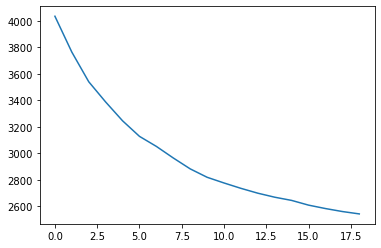

In [76]:
plt.plot(inertias)

In [77]:
n_clusters

8